# reduce 4 dimension to 2:

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
x = iris.data 
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state = 1234)
print('dim of x:',x.shape)
x_centered = x - np.mean(x,axis = 0)
U,s,Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:,0]  #first principal component
c2 = Vt.T[:,1]  #second principal component

#creating a dataset with d dimensionality, d<current dimensionality of x:
w2 = Vt.T[:,:2] #principal components with 2-D
new_dataset = x_centered.dot(w2)
print('dim of new_dataset:',new_dataset.shape)
new_dataset

dim of x: (150, 4)
dim of new_dataset: (150, 2)


array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

In [3]:
from sklearn.decomposition import PCA;   #using sklearn for reducing the dimension of a dataset

In [4]:
pca = PCA(n_components= 2)
new_set = pca.fit_transform(x)
new_set
#the proportion of the dataset's variance that lies a long each principal component:
pca.explained_variance_ratio_   #92 percent of dataset's variance lies in first principal component(PC).

array([0.92461872, 0.05306648])

# choosing right number of dimension:

In [24]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
dim = np.argmax(cumsum >= 0.95) + 1
dim

[0.92461872 0.97768521 0.99478782 1.        ]


2

In [28]:
pca = PCA(n_components= 0.97)
new_data = pca.fit_transform(x)
new_data.shape

(150, 2)

In [55]:
for i in np.arange(1,0,-0.2):
    print(i)

1.0
0.8
0.6000000000000001
0.40000000000000013
0.20000000000000018


the number of dimensions for each variance in lst: [1, 1, 2, 2, 2, 2, 3, 3]


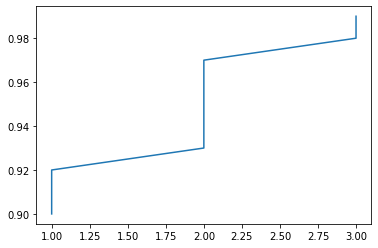

In [86]:
lst = [0.9,0.92,0.93,0.94,0.95,0.97,0.98,0.99] #percentage of variance in the dataset, ex:having 99 percent of variance in new dataset
lst2 = []
for i in lst:
    pca = PCA(n_components=i )
    pca.fit_transform(x)
    lst2.append(len(pca.explained_variance_ratio_) ) 
print('the number of dimensions for each variance in lst:',lst2)
plt.plot(lst2,lst)

# decompression by PCA

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784', version = 1)

In [7]:
x = mnist.data
y = mnist.target
x.shape

(70000, 784)

In [120]:
#find best number of dimension in mnist:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
number_of_dim= np.argmax(cumsum >= 0.95) + 1
number_of_dim

154

In [128]:
#create a new dataset by best number of dimension:
pca = PCA(n_components= 154)
new_mnist = pca.fit_transform(x)
x_recovered = pca.inverse_transform(new_mnist)

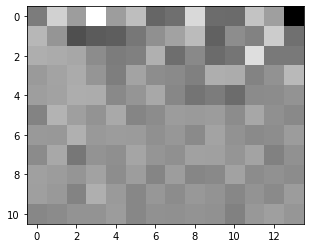

In [124]:
some_data = new_mnist[0].reshape(11,14)
#some_data = some_data.
plt.imshow(some_data, cmap = 'binary')
plt.show()

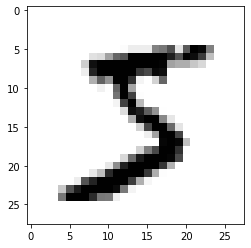

In [127]:
some = x[0].reshape(28,28)
plt.imshow(some, cmap = 'binary')

# Incremental PCA

In [9]:
from sklearn.decomposition import IncrementalPCA

In [10]:
n_baches = 100
inc_pca = IncrementalPCA(n_components= 154,)
for baches in np.array_split(x, n_baches):
    inc_pca.partial_fit(baches)

new_data = inc_pca.transform(x)

In [13]:
x.shape[0]

70000

In [14]:
m = x.shape[0]
n = x.shape[1]
X_mm = np.memmap(x, dtype = 'float32', mode = 'readonly', shape = (m,n))
batch_size = m//n_baches
inc_pca = IncrementalPCA(n_components= 154, batch_size= batch_size)
inc_pca.fit(X_mm)

TypeError: expected str, bytes or os.PathLike object, not numpy.ndarray

# kernel PCA

# LLE